**Load and preprocess the MNIST dataset**

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten the input images from 28x28 pixels to 784-dimensional vectors and normalize
def preprocess_data(X):
    X = X.reshape(X.shape[0], 784).astype('float32') / 255
    return X

X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

# Convert the target labels to categorical one-hot encoding
def one_hot_encode_labels(y):
    return np_utils.to_categorical(y, 10)

y_train = one_hot_encode_labels(y_train)
y_test = one_hot_encode_labels(y_test)


11490434/11490434 [==============================] - 1s 0us/step


**Build the neural network model**

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_mnist_model():
    model = Sequential()
    model.add(Dense(512, input_shape=(784,), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    return model

def compile_model(model):
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Create the model
model = create_mnist_model()

# Compile the model
compile_model(model)


**Train the model**

In [3]:
def train_model(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=128):
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)
    return history

# Train the model
history = train_model(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=128)


Epoch 1/10
469/469 [==============================] - 13s 25ms/step - loss: 0.2507 - accuracy: 0.9243 - val_loss: 0.1230 - val_accuracy: 0.9608
Epoch 2/10
469/469 [==============================] - 12s 26ms/step - loss: 0.1020 - accuracy: 0.9683 - val_loss: 0.0787 - val_accuracy: 0.9756
Epoch 3/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0731 - accuracy: 0.9770 - val_loss: 0.0827 - val_accuracy: 0.9727
Epoch 4/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0555 - accuracy: 0.9824 - val_loss: 0.0691 - val_accuracy: 0.9775
Epoch 5/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0457 - accuracy: 0.9850 - val_loss: 0.0744 - val_accuracy: 0.9779
Epoch 6/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0396 - accuracy: 0.9870 - val_loss: 0.0710 - val_accuracy: 0.9803
Epoch 7/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0342 - accuracy: 0.9893 - val_loss: 0.0793 - val_accuracy:

**Evaluate the model**

In [4]:
def evaluate_and_print_accuracy(model, X_test, y_test):
    accuracy = model.evaluate(X_test, y_test)[1]
    return accuracy

# Evaluate and print the accuracy
accuracy = evaluate_and_print_accuracy(model, X_test, y_test)
print("Accuracy:", accuracy)


313/313 [==============================] - 2s 6ms/step - loss: 0.0677 - accuracy: 0.9832
Accuracy: 0.9832000136375427


**Plot the training history**

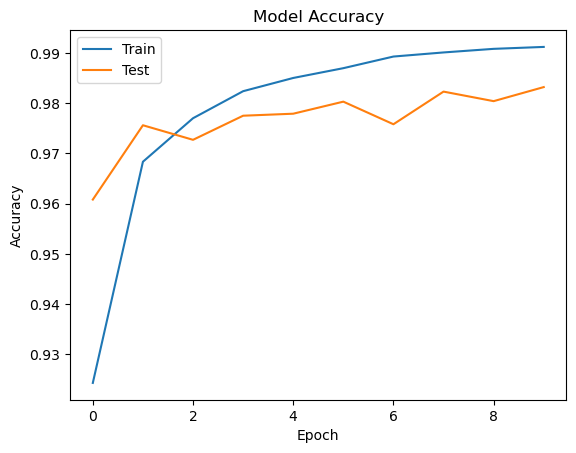

In [5]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Plot the training and validation accuracy
plot_accuracy(history)


**Make predictions**

In [6]:
def predict_single_image(model, image):
    # Expand the dimensions of the image to match the model's input shape
    image = np.expand_dims(image, axis=0)
    
    # Use the model to make predictions
    prediction = model.predict(image)
    
    # Get the predicted class
    predicted_class = np.argmax(prediction)
    
    return predicted_class

# Predict on a single image
digit = X_test[0]
predicted_digit = predict_single_image(model, digit)
print("Predicted digit:", predicted_digit)


1/1 [==============================] - 0s 205ms/step
Predicted digit: 7
